# <font color = firebrick>Tutorial 20: Linear Regression using OLS <a id='home'></a>

Welcome to this econometrics tutorial! Here, we will explore the basic models used in econometrics for analyzing economic data! So far, we have gathered several fundamental tools, and now it is time to apply them to understand economic relationships.

Simply put, econometrics involves using statistical models to analyse economic data and draw conclusions. It doesn't matter if you're new to econometrics. We'll start with the basics, focusing on the tools and ideas you'll need to use Python for analysis. If you have some experience of econometrics, you will find that Python makes the application of these concepts easier and more interactive.

In this course, we use statistical models to explain and predict relationships in data. We'll learn how to use statsmodels, a Python package specifically designed to build and estimate statistical models. You can explore its documentation here for reference: [docs](https://devdocs.io/statsmodels/).

**In this tutorial**, we will explain:
    
- what is Ordinary Least Squares (OLS) regression
- and how to use multivariate OLS regression

Each section includes examples, explanations, and interactive Python code, so you can see exactly how econometrics tools apply in real economic contexts. Let’s get started!

## 1.  Why OLS ? ([top](#home))<a id="math"></a>

To begin understanding econometrics, let’s frame a typical problem that economists encounter: identifying relationships between variables based on data from $ N $ observations. Suppose we are interested in a particular outcome or *explained variable*, which we’ll call $ y $. We also have data on several other factors, called *explanatory variables*, which we think may help to explain $ y $. Let’s denote these explanatory variables as $ x_1, x_2, \dots, x_p $.

For example, suppose an economist wants to predict future movements in a stock market index, like the S&P 500. They might use variables like interest rates, inflation, or other economic indicators as part of $ X $ to explain $ y $, the index level. Here, the *prediction* is based on an econometric model that estimates the relationship between $ y $ and $ X $. This approach not only enables forecasts of $ y $ but also allows for interpretation, giving insights into *how* and *why* changes in economic factors influence the S&P 500.

In econometrics, we assume that $ y $ is related to the $ x $ variables through a model we write as follows:

$$
y = f(X) + \epsilon
$$

where:

- $ y $ is the dependent variable, 
- $ X $ is the matrix of the explanatory variables,
- $ f(.) $ is the function that represents the *systematic* or *structural* relationship between $ X $ and $ y$,
- and $ \epsilon $ is the *noise* or *error term* which accounts for the variation in $ y $ that isn’t explained by $ X $ alone.

The primary goal in econometrics is to estimate $ f(.) $ which allows us to understand the relationship between $ y $ and $ X $. Estimating this relationship provides valuable insights into how changes in the explanatory variables impact the outcome. By analyzing this relationship, economists can also make predictions for $ y $ based on new values of $ X $.

Let's clarify right now how we link each observation - our dataset - with this equation. Our goal here is to find an equation $ y = f(X) + \epsilon$ that is designed to hold for each observation in our dataset. In other words, it means that this relationship holds for every individual observation $ i $, with $ i = 1, 2, \dots, N $:

$$
y_i = f(x_{i1}, x_{i2}, \dots, x_{ip}) + \epsilon_i
$$

where:
- $ y_i $ is the observed value of the dependent variable for the $ i $-th observation,
- $ x_{i1}, x_{i2}, \dots, x_{ip} $ are the values of the explanatory variables for that $ i $-th observation,
- and $ \epsilon_i $ is the error term for that  $ i $-th observation.

Now let's rewrite all these equations, each corresponding to an observation, into a single equation in matrix form. We assume that $ y $ is determined by a function $ f(X) $ of our explanatory variables plus some error term $ \epsilon $, as follows:

$$
\mathbf{y} = f(\mathbf{X}) + \boldsymbol{\epsilon}
$$

where:

$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{pmatrix}
=
f \left(
\begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1p} \\
x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{Np} \\
\end{pmatrix}
\right)
+
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N \\
\end{pmatrix}
$$

In this form:

- The vector $\mathbf{y}$ is a $ N \times 1 $ vector of observed values,
- The matrix $ \mathbf{X} $ is a $ N \times p $ matrix of explanatory variables, with each row corresponding to an observation.
- The vector $ \boldsymbol{\epsilon} $ is the $ N \times 1 $ vector of error terms for each observation.

This matrix notation shows that each $ y_i $ is given by applying $ f $ to its corresponding row of $ \mathbf{X} $ plus the error term $ \epsilon_i $.


# 2. Specifying the model

How do we decide which variables to include in $ X $, or what form $ f $ should take? In econometrics, the choice of $ f $ and $ X $ is guided by research questions and academic results, and by the data available. 

For example, suppose we want to study the effect of online advertising spending on e-commerce sales. The dependent variable $y$ could represent monthly sales, while the explanatory variables $X$ might include advertising expenditures, website traffic, and customer demographics. If our goal is to estimate the causal effect of advertising, we need to ensure that advertising expenditures are appropriately included as part of $X$. Moreover, our model should allow us to interpret results meaningfully, such as estimating the advertising elasticity of demand. Understanding this relationship helps in decision-making, like optimizing digital marketing strategies.

Here, we assume that the relationship between $y$ and $X$ is linear. Linear regression is chosen for its simplicity and interpretability, and because many complex relationships can be approximated or broken down into linear components, making it a multi-faceted starting point for modelling. This gives us the following data-generating process:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where $ \boldsymbol{\beta} $ is a $ p \times 1 $ vector of unknown parameters we aim to estimate.

For each observation $j$ we then have:

$$
y_j = \beta X_j + \epsilon_j
$$

and in matrix form with all the observations:

$$
\begin{pmatrix} 
    y_1 \\ 
    y_2 \\
    \vdots \\
    y_N
\end{pmatrix} = 
\begin{pmatrix}
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_p
\end{pmatrix} 
\begin{pmatrix}
    x_{11} & x_{12} & \dots & x_{1p} \\
    x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N1} & x_{N2} & \dots & x_{Np}
\end{pmatrix} + 
\begin{pmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_N
\end{pmatrix}
$$

This allows you to easily find each individual equation from the matrix form.


### A more practical example

Suppose we have $ N $ observations of monthly sales ($ y $) for an online store and advertising expenditures ($ X $) on a popular social media platform. We hypothesize that advertising spending influences sales. To capture this relationship, we use the model:

$$
y_j = \beta X_j + \epsilon_j, \quad j = 1, \dots, N
$$

This equation reflects that sales $ y_j $ for each month $ j $ depend on advertising spend $ X_j $ scaled by the coefficient $ \beta $ and a random error ($ \epsilon_j $) capturing other factors affecting sales. 

By estimating $ \beta $, we can answer questions like: How much does an additional dollar spent on advertising increase monthly sales? This provides actionable insights for businesses looking to optimize their advertising budgets.

# 3. Monte Carlo simulation

In general, for pedagogical reasons, we work with real data by assuming a functional form for $f$ and estimating the parameter $\beta$. This assumption is necessary to make the model fit the observed data as closely as possible. However, if the assumed form of $f$ is incorrect, the estimates of $\beta$ may be biased or inconsistent.

To overcome this uncertainty, we take a different approach here by generating our own data using a true Data-Generating Process (DGP). In this case, we know the exact value of $\beta$ and can directly evaluate how well our estimation method recovers it. This approach is called a Monte Carlo simulation and it allows us to test the performance and reliability of estimators under controlled conditions.


**Python code**

Execute the code below using "Shift+Enter". Explanations of the code are given below.

In [ ]:
#Importing libraries
import numpy as np # Used for numerical operations (e.g., generating random numbers).
import matplotlib.pyplot as plt # Used for plotting graphs.
import seaborn as sea # Data visualization library built on Matplotlib (not used in the code).
import pandas as pd # Used for data manipulation (not used in the code).


# Create a local random generator with a fixed seed to ensure the same "random" numbers are generated each time we run this code.
rng = np.random.default_rng(seed=10)

# Set values
beta = 1 # Coefficient for the independent variable X
N = 100 # Number of observations or data points

# Generate random N draws with an exponential distribution
X = rng.exponential(1,size=N)

# Generate random N draws with a normal distribution
eps = rng.normal(0,1,size=N)

# Determine Y
Y = X * beta + eps

# Create Figure
fig, ax = plt.subplots(figsize=(10,5)) # Creates a figure and axis with specified size for the plot.

ax.scatter(Y, X, alpha = 0.4, color='red') # Creates a scatter plot with X on the x-axis and Y on the y-axis, with some transparency (`alpha=0.4`) and red color for the points.

ax.set_xlabel('Independent variable (X)', size=18) # Set the labels and title for the plot.
ax.set_ylabel('Dependent variable (Y)', size=18)
ax.set_title(r'$Y_j = \beta X_j + \epsilon_j,\;\beta$=' + str(beta), size=20)

ax.spines['top'].set_visible(False) # Hide the top and right borders of the plot for a cleaner appearance.
ax.spines['right'].set_visible(False)

plt.show() # Displays the plot.

**Python code explanation**

1. **Setting the seed**:
   - `np.random.default_rng(seed=10)`: This sets the seed for the random number generator to ensure reproducibility. When the code is run multiple times, it generates the same "random" numbers.

2. **Generating random variables**:
   - `X = rng.exponential(1,size=N)`: Generates `N` random draws from an exponential distribution with a mean of 1. These are the values for the independent variable $X$.
   - `eps = rng.normal(0,1,size=N)`: Generates `N` random draws from a normal distribution with mean 0 and standard deviation 1. These are the error terms $\epsilon$.

4. **Calculating the dependent variable**:
   - `Y = X * beta + eps`: The dependent variable $Y$ is determined by the formula $Y = \beta X + \epsilon$, where $\beta = 1$.

**Why do we fix a random seed?**

In simulations, random numbers are used to generate artificial data. If we don’t fix the random seed, the data will change every time we run the code — meaning the results will also change. By setting a seed with `np.random.default_rng(seed=10)`), we make sure that:
- the same random numbers are generated each time,
- results are reproducible,
- we can debug and compare models fairly.

This is especially important in econometrics and Monte Carlo simulations, where we want to see how models behave — not how random noise changes.

Next, to better understand how the code works, you can print the different variables generated by the code and view their contents:

In [ ]:
print(rng)
print(X)

In [ ]:
print(eps)
print(fig, ax)

### Link with matrix notation

The Python code generates synthetic data for the linear regression model:
$$
Y_j = \beta X_j + \epsilon_j \quad \text{for } j = 1, \dots, N
$$
where:
- $ Y_j $ is the dependent variable.
- $ X_j $ is the independent variable.
- $ \beta $ is the coefficient (set to 1 in this example).
- $ \epsilon_j $ is the random error term, drawn from a normal distribution $ \mathcal{N}(0, 1) $.



\begin{array}{|c|c|c|c|}
\hline
\textbf{Python Code} & \textbf{Matrix Notation} & \textbf{Python Object} & \textbf{Explanation} \\
\hline
X = rng.exponential(1,size=N) & X \sim \text{Exponential}(1) & \text{List of size } N & \text{Generate } X \\
\hline
\epsilon = rng.normal(0,1,size=N) & \epsilon \sim \mathcal{N}(0, 1) & \text{List of size } N & \text{Generate noise } \epsilon \\
\hline
Y = \beta \cdot X + \epsilon & Y = X \beta + \epsilon & \text{List of size } N & \text{Compute } Y \\
\hline
\texttt{ax.scatter(Y, X, ...)} & \text{Scatter plot} & \text{N/A} & \text{Visualize } X \text{ vs. } Y \\
\hline
\texttt{ax.set\_title(...)} & Y_j = \beta X_j + \epsilon_j, \; \beta = 1 & \text{N/A} & \text{Set plot title} \\
\hline
\end{array}




### Interpretation of the generated plot

The scatter plot shows the generated data points. The independent variable $ X $ (on the x-axis) has been drawn from an exponential distribution and the dependent variable $ Y $ (on the y-axis) is a linear function of $ X $ with added random noise $ \epsilon $.

This visualization demonstrates how randomness in $ \epsilon $ creates variation in $ Y $, even when the relationship with $ X $ is linear.




**We present below the equivalent of this code in Stata and R.**

We present below the equivalents of this code for Stata and R. You are invited to click on the two texts below to discover the codes, read the explanations and test them in Stata and R. You can then compare these codes with the Python code. Note the similarities and differences between the three languages.

### Stata code

<details>
<summary>-- Click here to see the Stata code --</summary>

**Running code in Stata**

To run the code in **Stata** using Stata software, follow these steps:

1. **Open Stata**: Launch Stata
2. **Enter the Command Window**:
   - You can type commands directly in the **Command Window** in Stata.
3. **Copy and Paste the Code**:
   - Copy the Stata code (provided below).
   - Paste it into the **Command Window** in Stata.
4. **Execute the Code**:
   - Press **Enter** after pasting the code. Stata will execute the code and display results in the **Results Window**.


You can also save this code in a **do-file** for later execution:
- In Stata, go to File > New Do-file or use the Do-file Editor.
- Paste your code into the Do-file.
- Save the file (e.g., my_analysis.do).
- In the Command Window, run the code by typing: do my_analysis.do and press Enter.

**Stata code** 
```stata
set seed 10

* Set values
local beta 1
local N 100

* Generate random draws for X and eps
gen X = rexp(1) in 1/`N'
gen eps = rnormal(0,1) in 1/`N'

* Calculate Y
gen Y = `beta' * X + eps

* Scatter plot
twoway (scatter Y X, mcolor(red) msymbol(O) msize(medium)) ///
       , xlabel(, size(18)) ylabel(, size(18)) title("$Y_j = \beta X_j + \epsilon_j, \;\beta=" + string(`beta')) size(20)
```

**Stata code explanation**

- ``gen X = rexp(1) in 1/`N'``: Generates $N$ random draws from an exponential distribution.
- ``gen eps = rnormal(0,1) in 1/`N'``: Generates $N$ random draws from a normal distribution with mean 0 and standard deviation 1.
- ``twoway scatter`: Plots $𝑌$ against $X$ with red circles as markers (``mcolor(red)`).
- The ``xlabel()``, ``ylabel()``, and ``title()`` options adjust the appearance of the plot, including the labels and title.
</details>



### R code

<details>
<summary>-- Click here to see the R code --</summary>



**Running code in R using RStudio**

To run the code in R using RStudio, follow these steps:

1. **Open RStudio:** Launch RStudio
2. Go to File > New File > R Script or press Ctrl + Shift + N to open a new R script.
3. Copy-paste the R code into the R script in the RStudio editor.
4. Run the Code:
- Highlight the code you want to run.
- Press Ctrl + Enter (Windows/Linux) or Cmd + Enter (Mac) to execute the selected code in the Console.

Alternatively, you can click on the Run button at the top of the script editor to execute the entire script.

**R code** 
```
# R code example
set.seed(10)

# Set values
beta <- 1
N <- 100

# Generate random draws for X and eps
X <- rexp(N, rate = 1)
eps <- rnorm(N, mean = 0, sd = 1)

# Calculate Y
Y <- beta * X + eps

# Create a scatter plot with equation in title
plot(X, Y, col = "red", pch = 16, 
     xlab = "Independent Variable (X)", 
     ylab = "Dependent Variable (Y)", 
     main = expression(paste("Y[j] = ", beta, " * X[j] + epsilon[j], ", beta, " = ", 1)))
```


**R code explanation**

- ``X <- rexp(N, rate = 1)``: Generates N random draws from an exponential distribution.
- ``eps <- rnorm(N, mean = 0, sd = 1)``: Generates N random draws from a normal distribution.
- ``Y <- beta * X + eps``: Calculates the dependent variable $Y$.
- ``plot()``: Creates the scatter plot with red points (``col = "red"``), adjusted point size (``pch = 16``), axis labels, and the plot title that includes the value of $\beta$.

</details>

### <font color='orange'>Task #1:</font> Analyze the Impact of $\beta$ on the Data-Generating Process (DGP)

Modify the value of $\beta$ to 0.5, 2, and 5 in the code, and re-run the code for each value of $\beta$.

1. How does $\beta$ affect the slope of the relationship between $𝑋$ (independent variable) and $𝑌$ (dependent variable)?
2. Does increasing $\beta$ make the observations more spread out or closer together? Why?

<details>
<summary>-- Click here to see the answer --</summary>
    
1. **How does $\beta$ affect the slope?**

$\beta$ is the slope of the deterministic part of the Data-Generating Process (DGP). If we change $\beta$, we scale the systematic relationship between $X$ and $Y$. A larger $\beta$ means a steeper slope, while a smaller $\beta$ means a flatter slope. Graphically, the regression line $Y = \beta X$ rotates around the origin (in our simple model with no intercept).

2. **Does increasing $\beta$ make observations more spread out or closer?**

The variance of $Y$ is (assuming $X$ and $\varepsilon$ are independent):

$$
Var(Y)=Var(\beta X + \epsilon)= \beta^2 Var(X)+Var(\epsilon)
$$.

As $|\beta|$ increases, the term $\beta^2 Var (X)$ grows, so the total variance of $Y$ increases — the observations become more spread out vertically. Intuitively, scaling the systematic part $\beta X$ stretches the cloud of points along the $Y$-axis. The noise term $\varepsilon$ remains the same but its relative importance diminishes when $\beta$ is large.
    </details>

# 4. Estimator $\hat{\beta}$
Since we assume that the relationship between $Y$ and $X$ is linear through $f$, this means that we want to draw a line that passes through the data points starting from the origin. We want this line to pass through as many data points as possible. Intuitively, you can think of placing a ruler at the point $(0,0)$ and rotating it until the line seems to capture the overall trend of the data — we will now formalize this idea mathematically.

In Ordinary Least Squares (OLS), the “best” line is the one that minimizes the total squared distance between the observed points and the predicted values — these vertical distances are called *residuals*. The optimization problem is therefore:
$$
\min_{\beta} \sum_j \left[ Y_j - \underbrace{(X_j \beta)}_{\text{Predicted value}} \right]^2
$$
where:
- $Y_j$ is the dependent variable for observation $j$,
- $X_j$ is the independent variable (or vector of regressors),
- $\beta$ is the parameter (or vector of parameters) to be estimated,
- and $\left[Y_j - X_j \beta\right]$ is the residual, denoted $\hat{\varepsilon}_j$.

In the underlying population model, we assume that
$
Y_j = X_j \beta + \varepsilon_j,
$
where $\varepsilon_j$ is the *true* (unobserved) error term that captures all factors affecting $Y_j$ other than $X_j$. It represents the difference between the actual and predicted values for each observation.

  
The OLS method — *Ordinary Least Squares* — thus finds the value of $\beta$ that minimizes the **sum of squared residuals**, producing the line that best fits the data in the least-squares sense. The term *“ordinary”* simply refers to this being the most basic and widely used version of least-squares estimation. In other words, we estimate the parameter $\beta$ that defines the slope of the regression line so that the total squared distance between the data points and the fitted line is as small as possible.

**Why minimize the squared errors?**

Squaring the error ensures we're indifferent between overestimation and underestimation, and penalizes larger errors more. Summing the squared errors across all data points gives the total error. To find $\beta$ that minimizes the error, we take the derivative of the sum with respect to $\beta$ and set it equal to zero (FOC):

$$
\frac{\partial}{\partial \beta} \sum_j \left[ Y_j - X_j \beta \right]^2= 
-2\sum_j X_j\left[ Y_j - X_j \beta \right] = 0
$$

Re-arranging this expression, we get:

$$
\sum_j X_j Y_j - \beta \sum_j X_j^2 = 0 \Longrightarrow \quad \boxed{\hat{\beta} = \frac{\sum_j  X_j Y_j}{\sum_j X_j^2}}
$$

Then, we can substitute $Y_j = \beta X_j + \varepsilon_j$, which gives:

$$
\hat{\beta}
= \frac{\sum_j X_j(\beta X_j + \varepsilon_j)}{\sum_j X_j^2}
= \beta + \frac{\sum_j X_j \varepsilon_j }{\sum_j X_j^2}.
$$

We deduce from this the estimation error:

$$
\hat{\beta} - \beta = \frac{\sum_j X_j \varepsilon_j }{\sum_j X_j^2}.
$$


To ensure that $\hat{\beta}$ is unbiased, we assume the **zero conditional mean** condition:

$$
\forall j \quad  \mathbb{E}[\varepsilon_j \mid X_j] = 0.
$$

This assumption says that the expected value of the error term given $X_j$ is zero. Thus knowing $X_j$ tells us nothing systematic about the error term. That means there is no systematic relationship between $X_j$ and $\varepsilon_j$.


Under this assumption, and using the law of total expectation ($\mathbb{E}[X_j \varepsilon_j ]
= \mathbb{E}\!\left[\mathbb{E}[X_j\varepsilon_j \mid X_j]\right]$), we have:

$$
\mathbb{E}\!\left[\sum_j X_j \varepsilon_j \right]
= \sum_j \mathbb{E}[X_j \varepsilon_j ]
= \sum_j \mathbb{E}\!\left[\mathbb{E}[X_j\varepsilon_j \mid X_j]\right]
= \sum_j \mathbb{E}\!\left[X_j\,\mathbb{E}[\varepsilon_j \mid X_j]\right]
= 0.
$$

Hence, $\mathbb{E}[\hat{\beta}] = \beta$, meaning $\hat{\beta}$ is an unbiased estimator of $\beta$. Overall, we have shown:

$$
\boxed{
\hat{\beta} = \frac{\sum_j X_jY_j}{\sum_j X_j^2}
= \beta + \frac{\sum_j X_j\varepsilon_j}{\sum_j X_j^2}
}
$$


**Remark** Assuming independence between $X_j$ and $\varepsilon_j$
(i.e., $\mathbb{E}[X_j\varepsilon_j] = \mathbb{E}[X_j]\mathbb{E}[\varepsilon_j]$)
is stronger than necessary. The zero conditional mean assumption
$\mathbb{E}[\varepsilon_j \mid X_j] = 0$
is sufficient and standard in econometrics.

Now, here's the key insight: we've assumed that $\epsilon_j$ represents random noise. Since this noise is random, it cannot be correlated with $X$, that is $ X_j $ and $ \epsilon_j $ are independent and $ E(X_j \epsilon_j) = E(X_j) \cdot E(\epsilon_j) $. Given that $ E(\epsilon_j) = 0 $, we have $ E\left(\sum_j X_j \epsilon_j\right) = \sum_j 0 = 0 $. It means that the term $\sum_j X_j \epsilon_j$ will be zero in expectation (or close to zero when the number of observations is large).


We can verify this result using the graph below. On the graph, the scatter points represent the actual data points $(X_j, Y_j)$ on the graph. The blue line is the best fit line that minimizes the total squared distance between the data points and the line, which is the line of predicted values. The residuals are the vertical distances between the scatter points and the regression line.


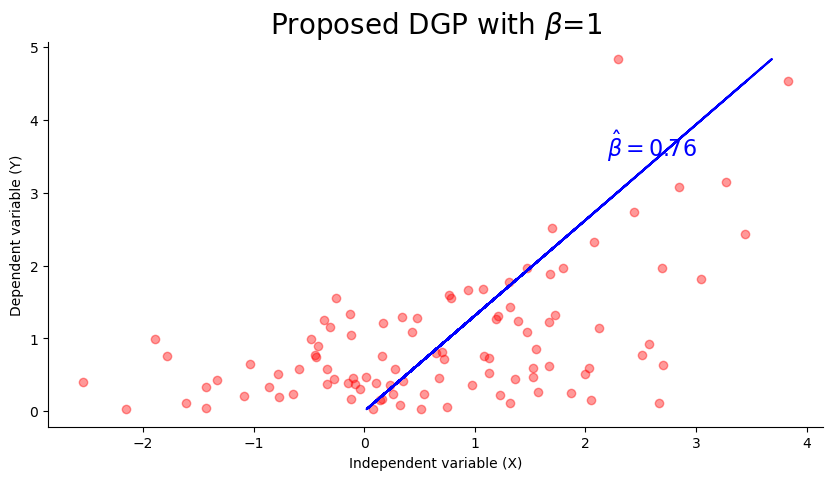

In [25]:
numerator = np.sum(Y*X)
denominator = np.sum(X*X)
bhat = numerator/denominator

Yhat = X*bhat 

# Create Figure
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(Y,X, alpha = 0.4, color = 'red')
ax.plot(Yhat,X, color = 'blue')

ax.set_xlabel('Independent variable (X)')
ax.set_ylabel('Dependent variable (Y)')
ax.set_title(r'Proposed DGP with $\beta$='+str(beta),size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate(fr'$\hat\beta=${bhat:.2f}', (2.2,3.5),size=16, color='blue')

plt.show()

**Python code explanation**
- ``numerator = np.sum(Y * X)``: This calculates the sum of the product of the observed values of Y and X, which is used in calculating the estimate for $\hat{\beta}$.
- ``denominator = np.sum(X * X)``: This calculates the sum of the squares of X, which is part of the denominator for calculating $\hat{\beta}$
- ``bhat = numerator / denominator``: This divides the sum of products by the sum of squares to get the estimated value of $\hat{\beta}$, which minimizes the least squares error.
- ``Yhat = X * bhat``: This computes the predicted values of Y using the estimated $\hat{\beta}$.

The code uses Matplotlib to create a scatter plot of the data points (Y vs X) in red with a transparency of 0.4 (alpha = 0.4). It then plots the estimated regression line (Yhat vs X) in blue. Labels for the axes and title are set, and the top and right spines are removed for a cleaner plot.
Annotation:

The code annotates the plot with the estimated $\hat{\beta}$ value at coordinates (2.2, 3.5).

### Link with matrix notation

We propose here to connect the Python code to the matrix notation by explaining the key calculations in the mathematical framework of linear regression. The relationship between the dependent variable \( Y \) and the independent variable \( X \) in matrix form is given by:
$$
Y = X \beta + \epsilon
$$
where:
- $ Y $ is the $ N \times 1 $ vector of observed dependent variables.
- $ X $ is the $ N \times p $ matrix of independent variables (in your example, \( X \) is a column vector since there is one independent variable).
- $ \beta $ is the $ p \times 1 $ vector of coefficients to be estimated.
- $ \epsilon $ is the $ N \times 1 $ vector of residuals (errors).

The ordinary least squares (OLS) estimate for $ \beta $ is:
$$
\hat{\beta} = \frac{X^\top Y}{X^\top X}
$$
This formula minimizes the sum of squared errors.

### Mapping to the Python code

1. **Calculate $\hat{\beta}$:**
   - The numerator in the code, `np.sum(Y * X)`, corresponds to $ X^\top Y $, the inner product of $ X $ and $ Y $.
   - The denominator, `np.sum(X * X)`, corresponds to $ X^\top X $, the inner product of $ X $ with itself.
   - The division `numerator / denominator` gives $ \hat{\beta} $, the estimated coefficient.

2. **Predict $ Y $:**
   - `Yhat = X * bhat` calculates the predicted values, corresponding to $ \hat{Y} = X \hat{\beta} $.

3. **Plot the Data and Model:**
   - The scatter plot visualizes the data points ($ Y $ vs. $ X $).
   - The line plot shows the fitted regression line ($ \hat{Y} $ vs. $ X $).

4. **Annotation:**
   - The annotation in the plot highlights the estimated $ \hat{\beta} $ value, providing a numerical summary of the slope of the regression line.

### Python code and matrix notation side-by-side

$$
\begin{array}{|c|c|c|c|}
    \hline \textbf{Python code} & \textbf{Matrix notation} & \textbf{Python Object} & \textbf{Explanation} \\ 
    \hline
    \texttt{numerator = np.sum(Y * X)} & X^\top Y & \texttt{float} &  \text{Inner product of } X \text{ and } Y \\
    \hline
    \texttt{denominator = np.sum(X * X)} & X^\top X & \texttt{float}  & \text{Inner product of } X \text{ with itself} \\
    \hline
    \texttt{bhat = numerator / denominator} & \hat{\beta} = \frac{X^\top Y}{X^\top X} & \texttt{float}  & \text{Estimate the coefficient minimizing } \\
    &  & & \text{the least squares error}  \\
    \hline
    \texttt{Yhat = X * bhat} & \hat{Y} = X \hat{\beta} & \texttt{numpy.ndarray} (size N)  & \text{Predicted values using the estimated } \hat{\beta} \\
    \hline
\end{array}
$$

### Stata code

<details>
<summary>*Click here to see the Stata code*</summary>

```
* Set seed for reproducibility
set seed 10

* Define parameters
local beta = 1
local N = 100

* Generate data
gen X = exp(runiform())
gen eps = rnormal(0, 1)
gen Y = `beta' * X + eps

* Estimate beta
gen bhat = sum(Y * X) / sum(X * X)
gen Yhat = X * bhat

* Plotting
scatter Y X, mcolor(red) msymbol(o) msize(0.5) xlabel(, grid) ylabel(, grid)
line Yhat X, lcolor(blue) 
text 2.2 3.5 "β̂ = " + string(bhat, "%9.2f"), color(blue) size(medium)
```

**Stata code explanation**

- ``gen X = exp(runiform()``: Generates N random values from an exponential distribution for X.
- ``gen eps = rnormal(0, 1)``: Generates N random errors (residuals) from a normal distribution.
- ``gen Y = \beta'*X + eps``: Calculates Y as the dependent variable in the model $Y = \beta X + \epsilon$
- ``gen bhat = sum(Y * X) / sum(X * X)``: Computes the estimated $\hat{\beta}$.
- ``gen Yhat = X * bhat``: Calculates the predicted Y values using the estimated $\hat{\beta}$.
- ``scatter Y X``: Creates a scatter plot with red dots.
- ``line Yhat X``: Plots the regression line.
- ``text``...: Annotates the plot with the estimated $\hat{\beta}$.

</details>
    

### R code

<details>
<summary>*Click here to see the Stata code*</summary>

    
```
# Set seed for reproducibility
set.seed(10)

# Define parameters
beta <- 1
N <- 100

# Generate data
X <- rexp(N, rate = 1)
eps <- rnorm(N, mean = 0, sd = 1)
Y <- beta * X + eps

# Estimate beta
numerator <- sum(Y * X)
denominator <- sum(X * X)
bhat <- numerator / denominator
Yhat <- X * bhat

# Plotting
plot(X, Y, pch = 16, col = rgb(1, 0, 0, alpha = 0.4), xlab = "Independent Variable (X)", 
     ylab = "Dependent Variable (Y)", main = paste("Proposed DGP with β =", beta))
lines(X, Yhat, col = "blue")
text(2.2, 3.5, paste("β̂ =", round(bhat, 2)), col = "blue", cex = 1.5)

```

**R code explanation**

- ``X <- rexp(N, rate = 1)``: Generates N random values from an exponential distribution for the independent variable X.
- ``eps <- rnorm(N, mean = 0, sd = 1)``: Generates N random errors (residuals) from a normal distribution.
- ``Y <- beta * X + eps``: Calculates the dependent variable Y based on the model $Y = \beta X + \epsilon$.
Estimate Beta ($\hat{\beta}$):

- ``numerator <- sum(Y * X)``: Calculates the sum of the product of the observed values of Y and X.
- ``denominator <- sum(X * X)``: Calculates the sum of the squares of X.
- ``bhat <- numerator / denominator``: Calculates the estimated $\hat{\beta}$.
- ``plot(X, Y, ...)``: Creates a scatter plot with transparency (alpha = 0.4) for better visualization.
- ``lines(X, Yhat, col = "blue")``: Plots the regression line.
- ``text(2.2, 3.5, ...)``: Adds the estimated value of $\hat{\beta}$ on the plot.

</details>

### <font color='orange'>Task #2:</font> Standardize $𝑋$
We want to standardize the $X$ values before calculating $Y$. We replace the original $𝑋$ with its standardized version:
$$
    X_{standard.}= \frac{X-\text{mean}(X)}{\text{std}(X)}
$$
 
Implement this transformation in the code:
```
X_standardized = (X - np.mean(X)) / np.std(X)
```

Re-run the code with the standardized $𝑋$, and compare the scatter plot and title to the original $X$.

1. How does standardizing $X$ affect the interpretation of $\beta$?
2. Does the distribution of $Y$ change? Why or why not?

# 5. Variance of our estimate
Our estimate of $\beta$ is accurate, but it's not exactly the true value. Why? Recall that earlier we assumed the interaction between $X$ and $\epsilon$ to be zero in expectation. If this assumption is not true, then $\hat{\beta}$ will be incorrect. Thus, our estimate of $\beta$ is an approximation and we want to understand the **variance** of this estimate to quantify the uncertainty.

### Variance of $\hat{\beta}$

The variance of $\hat{\beta}$ is defined as:

$$
V(\hat{\beta}) = \frac{1}{N} \sum_j \left[ (\beta - \hat{\beta}) X_j \right]^2
$$

where:

- $N$ is the number of observations,
- $X_j$ is the observed value of the independent variable for observation $j$,
- $\hat{\beta}$ is the estimated coefficient,
- and $\beta$ is the true value of the coefficient (which we are trying to estimate).

It measures the spread of the estimated values of $\hat{\beta}$ around the true value, reflecting the uncertainty in our estimate.

From the Ordinary Least Squares (OLS) estimation, we know that:
$$
\begin{aligned}
\hat{\beta} = \beta + \frac{\sum_j \epsilon_j  X_j}{\sum_j X_j^2}
\end{aligned}
$$


which we replace in the variance formula:
$$
V(\hat{\beta}) = \frac{1}{N} \sum_j \left[ \frac{\sum_k \epsilon_k  X_k}{\sum_k X_k^2}. X_j \right]^2 = \frac{1}{N} \left[ \frac{\sum_k \epsilon_k  X_k}{\sum_k X_k^2} \right]^2 \sum_j X_j^2 = \frac{1}{N}  \frac{\left[\sum_k \epsilon_k  X_k\right]^2}{\sum_k X_k^2} 
$$

This simplifies to:

$$
V(\hat{\beta}) = \frac{\sigma^2}{\sum_j X_j^2}
$$

where:
-  $\sigma^2$ represents the variance of the error term $\epsilon_j$, which measures the spread or variability of the errors around the regression line.
- $\sum_j X_j^2$ is the sum of the squared values of the independent variable $X_j$, which reflects the variation or spread of the independent variable itself.

This simplification shows that the variance of the estimated $\beta$ depends on the variability in both the error term $\epsilon_j$and the independent variable $X$. Higher variability in $X$ reduces the variance of $\hat{\beta}$, making the estimate more precise. The $\sigma^2$ represents the inherent noise in the system (how much the errors vary), which impacts the precision of our estimate of $\beta$.

In OLS, $\sigma^2$ represents the variance of the error term $\epsilon_j$. Since we don't know the true errors 
$\epsilon_j$, we approximate $\sigma^2$ by calculating the variance of the residuals, which are our best estimate of the errors:
$$\sigma^2 = \frac{\sum_j \epsilon_j^2}{N - p}$$

with $p$ being the number of parameters estimated.

The term $N - p$ represents the degrees of freedom. Since we don't know the true $\epsilon$, we estimate it and use the estimated $\hat{\epsilon}$ for the calculation. Thus, the estimated variance of $\hat{\beta}$ is:

$$
V(\hat{\beta}) = \frac{\sum_j \hat{\epsilon}_j^2}{\sum_j X_j^2}
$$

where $\epsilon_j$ is approximated by the residuals $\hat{\epsilon}_j=Y_j-\hat{Y}_j$. This expression effectively "averages" the squared residuals, with the adjustment for the number of estimated parameters.

### Standard error and t-test

The **standard error** (SE) of $\hat{\beta}$ is the square root of its variance:

$$
\text{SE}(\hat{\beta}) = \sqrt{V(\hat{\beta})}
$$

To test whether $\hat{\beta}$ is significantly different from a null hypothesis (often $\beta_0 = 0$, meaning no relationship between $X$ and $Y$), we use a **t-test**:

$$
t = \frac{\hat{\beta} - \beta_0}{\text{SE}(\hat{\beta})} \sim T_{N - p}
$$

where $T_{N - p}$ represents the T-distribution with $N - p$ degrees of freedom. A commonly used rule of thumb is that for a t-statistic greater than 2, we can reject the null hypothesis with 95% confidence.

In practice, we often report the **standard errors** because they allow us to compute t-statistics for different null hypotheses.

**What is a T-distribution?**

The **T-distribution** is a probability distribution that arises when estimating the mean of a normally distributed population with small sample sizes and unknown population variance. It resembles the standard normal distribution but has heavier tails, accounting for greater variability in small samples. As the sample size increases, the T-distribution aHpproaches the standard normal distribution.

Key characteristics:
-  The shape of the T-distribution depends on the \textbf{degrees of freedom (df)}, calculated as $ df = N - p$ where $N$ is the sample size and $p$ is the number of parameters estimated.
- With more degrees of freedom, the T-distribution converges to the standard normal distribution.

**How to apply a t-test in practice?**

The **t-test** is used to determine if an estimated coefficient or sample mean differs significantly from a hypothesized value (null hypothesis). The steps to apply it are:

1. Set up the null and alternative hypotheses:
    - null hypothesis: $(H_0): \beta = \beta_0$
    - alternative hypothesis: $(H_1): \beta \neq \beta_0$ (two-tailed test) or $ \beta > \beta_0$, $\beta < \beta_0$ (one-tailed test)

2. Compute the t-statistic:
    $$
    t = \frac{\hat{\beta} - \beta_0}{\text{SE}(\hat{\beta})},
    $$
    where $\hat{\beta}$ is the estimated coefficient, $\beta_0$ is the hypothesized value under $H_0$ (often 0), and $\text{SE}(\hat{\beta})$ is the standard error of $\hat{\beta}$.
 
3. Determine the critical value or p-value:
    - For a two-tailed test at the $95\%$ confidence level, compare $|t|$ to the critical value $t^*$ from the T-distribution table with $df = N - p$.
    - Alternatively, compute the p-value and compare it to the significance level ($\alpha$, typically 0.05).

4. Make a decision: if $|t| > t^*$ (critical value), or $p < \alpha$, reject $H_0$, otherwise, fail to reject $H_0$.

**Example with numbers**

Suppose we estimate the regression coefficient $\hat{\beta} = 1.2$ with a standard error $\text{SE}(\hat{\beta}) = 0.3$, and we test the null hypothesis $H_0: \beta = 0$.

1. Compute the t-statistic:
    $$
    t = \frac{\hat{\beta} - \beta_0}{\text{SE}(\hat{\beta})} = \frac{1.2 - 0}{0.3} = 4.0.
    $$

2. Compare to the critical value: For $df = N - p$ and a $95\%$ confidence level, the critical value $t^*$ might be approximately $2.0$ from the T-distribution table below:

| **df**  | **$0.10$**    | **$0.05$**    | **$0.02$**    | **$0.01$**        | **$0.001$**        |  
|---------|---------------|---------------|---------------|-------------------|--------------------|  
| 1       | 6.314         | 12.706        | 31.821        | 63.657            | 636.619            |  
| 2       | 2.920         | 4.303         | 6.965         | 9.925             | 31.599             |  
| 3       | 2.353         | 3.182         | 4.541         | 5.841             | 12.924             |  
| 4       | 2.132         | 2.776         | 3.747         | 4.604             | 8.610              |  
| 5       | 2.015         | 2.571         | 3.365         | 4.032             | 6.869              |  
| 10      | 1.812         | 2.228         | 2.764         | 3.169             | 4.587              |  
| 20      | 1.725         | 2.086         | 2.528         | 2.845             | 3.850              |  
| 30      | 1.697         | 2.042         | 2.457         | 2.750             | 3.646              |  
| 40      | 1.684         | 2.021         | 2.423         | 2.704             | 3.551              |  
| ∞       | 1.645         | 1.960         | 2.326         | 2.576             | 3.291              |  


- Find the row corresponding to your degrees of freedom ($\text{df} = N - p$).
- Select the column corresponding to your desired significance level ($\alpha$).
- Compare your calculated $t$-statistic to the critical value:
     - If $|t| > t^*$, reject the null hypothesis.
     - If $|t| \leq t^*$, fail to reject the null hypothesis.

For example:
- If $df = 10$, the critical value $t^* = 2.228$.
- If $df = 30$, the critical value $t^* = 2.042$.
- As $df \to \infty$, the T-distribution converges to the standard normal distribution with $t^* = 1.960$.

3. Make a decision: Since $|4.0| > 2.0$, we reject $H_0$ and conclude that $\beta \neq 0$.

By applying the t-test, we determine whether $\hat{\beta}$ provides evidence of a significant relationship between $X$ and $Y$.


In [ ]:
resid = Y-X*bhat
s =  np.sum(resid**2)/(N-1)
var = s/(np.sum(X**2))

se = np.sqrt(var)

# Create Figure
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(Y,X, alpha = 0.4, color = 'red')
ax.plot(Yhat,X, color = 'blue')

ax.set_xlabel('Independent variable (X)')
ax.set_ylabel('Dependent variable (Y)')
ax.set_title(r'Proposed DGP with $\beta$='+str(beta),size=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate(fr'$\hat\beta=${bhat:.2f} ({se:.4f})', (1.6,3.5),size=16, color='blue')

plt.show()

From the graph, we can see that our simple linear model replicates the data well and -- since we know the true DGP -- also recovers the true value of $\beta$. 

In our simple example we only included on variable and therefore only solved for one coefficient. Going forward, our data will be much more complicated (e.g., more independent X variables) and we'll want to account for the possibility that our dependent variable attains some value independent of the observed X variables in our data -- we'll want to include a constant in our $f()$ specification. It turns out that doing all of this is pretty straight-forward and the intution gained from our simple example extends easilly. 

### <font color='orange'>Task #3</font>

1. Increase N to $\{200,500,1000\}$. What happens to the estimated coefficient $(\hat\beta)$ and the estimated standard errors $(\hat \epsilon)$?

2. Change the specification by changing $\beta$ to a value of your choice and re-run the code to find $\hat\beta$.

# 6. Multivariate OLS Regression  ([top](#home))<a id="ols"></a>

Until now, we have worked on simple linear regression, which consists of analyzing the relationship between two variables: a dependent variable $Y$ and an independent variable $X$. While this method provides useful information, particularly in terms of methodology, real-world problems are much more complex and closely interrelated, requiring us to incorporate several factors simultaneously. Multivariate regression using ordinary least squares (OLS) allows us to extend the simple regression framework to include additional independent variables, giving us a better understanding of the relationships between the data.

For example, after initially studying the effect of education on wages, new variables such as work experience, industry, and location can be added to the model to better isolate and interpret the influence of education. This extension involves adding additional terms to the regression equation:

$$
    Y = \beta_0 + \beta_1 X_1 +\beta_2 X_2 +…+\beta_k X_k+ \epsilon
$$

where:
- $X_1,X_2,...,X_k$ are independent variables,
- $\beta_1, \beta_2, ...,\beta_k$ are their corresponding coefficients,
- and $\epsilon$ represents the error term.

Multivariate regression makes it possible to answer questions such as *What is the effect of one variable, holding the others constant?’*

### Which database?

We will use examples from Wooldridge's popular textbook, *Introductory Econometrics: A Modern Approach*. This textbook is familiar to (almost) all students of econometrics.
The data sets accompanying the textbook are readily available and, more importantly, already cleaned up. The only drawback is that they are supplied in STATA's .dta format.

**Reading Stata files in Python**

Fortunately, Python's `pandas` library provides the `read_stata` function, which allows us to import easily .dta files into Python. You'll find more details in the official [pandas.read_stata documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_stata.html).

In addition to .dta files, pandas supports a wide range of file formats, including CSV, Excel, JSON, SQL, and SAS, making it an amazing versatile tool for data manipulation.

**Biddle and Hamermesh's model**

Let's explore the relationship between labor wages and sleep using a 1990 paper by Biddle and Hamermesh ([link](https://www.jstor.org/stable/2937618?seq=1)). The authors use time-use data from 12 countries to examine whether an increase in wages leads individuals to sacrifice sleep.

The basic idea is that people face time constraints. When wages increase, individuals may choose to sacrifice sleep to allocate more time to work and earn additional income. If we put this into a consumer optimization problem, then utility $U$ will depend on both sleep $s$ and consumption $c$:
$$
\begin{aligned}
    \max \, & \; U(\underbrace{T-n}_{\text{sleep}}, c) \\
    \text{s.t.} \quad & T \geq n + s, \\
                              & \underbrace{n\cdot w}_{\text{income}} \geq \underbrace{p\cdot c}_{\substack{\text{money spent}\\ \text{on consumption}}}
\end{aligned}
$$
where:
- $T$ is the total available time.
- $n$ is the time spent working and $T-n$ the time spent sleeping
- $c$ is the consumption of goods or services
- $s$ is sleep time.
- $w$ is the wage rate.
- $p$ is the price of consumption goods.


The utility is subject to two constraints:
- $T≥n+s$: The total time $T$ must be at least equal to the sum of working time $n$ and sleeping time $s$.
- $n\cdot w \geq p \cdot c$: The income $w \cdot n$ must cover the consumption cost $p \cdot c$.

The underlying idea behind this maximization is that people face time constraints. When wages rise, individuals may sacrifice sleep to spend more time at work and earn extra income. However, since total time $T$ is fixed, to increase worktime reduces sleeping time. While the authors want to show a causal link, ordinary least squares (OLS) regression will just reveal correlations.

Let’s first load the dataset and have a look at the variables:

In [26]:
# Use pandas read_stata method to get the stata formatted data file into a DataFrame.
sleep = pd.read_stata('Tutorial_Python_20_OLS/SLEEP75.DTA')

# Take a look!
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


The dataset contains the following variables:

| Variable | Description | Variable | Description | Variable | Description |Variable | Description |
| :------: | :---------- | :------: | :---------- |:-------: | :---------- |:------: | :---------- |
|**age**   |  in years	 |**leis1**	|sleep - totwrk	 | 	**rlxall**	 | 	 slpnaps + personal activs	 | 	**worknrm**	 | 	 mins work main job	 | 
 | 	**black**	 | 	 =1 if black	 | 	**leis2**	 | 	 slpnaps - totwrk	 | 	**selfe**	 | 	 =1 if self employed	 | 	**workscnd**	 | 	 mins work second job	 | 
 | 	**case**	 | 	 identifier	 | 	**leis3**	 | 	 rlxall - totwrk	 | 	**sleep**	 | 	 mins sleep at night, per wk	 | 	**exper**	 | 	 age - educ - 6	 | 
 | 	**clerical**	 | 	 =1 if clerical worker	 | 	**smsa**	 | 	 =1 if live in smsa	 | 	**slpnaps**	 | 	 minutes sleep, inc. naps	 | 	**yngkid**	 | 	 =1 if children < 3 present	 | 
 | 	**construc**	 | 	 =1 if construction worker	 | 	**lhrwage**	 | 	 log hourly wage	 | 	**south**	 | 	 =1 if live in south	 | 	**yrsmarr**	 | 	 years married	 | 
 | 	**educ**	 | 	 years of schooling	 | 	**lothinc**	 | 	 log othinc, unless othinc < 0	 | 	**spsepay**	 | 	 spousal wage income	 | 	**hrwage**	 | 	 hourly wage	 | 
 | 	**earns74**	 | 	 total earnings, 1974	 | 	**male**	 | 	 =1 if male	 | 	**spwrk75**	 | 	 =1 if spouse works	 | 	**agesq**	 | 	 age^2	 | 
 | 	**gdhlth**	 | 	 =1 if in good or excel. health	 | 	**marr**	 | 	 =1 if married	 | 	**totwrk**	 | 	 mins worked per week	 | 				
 | 	**inlf**	 | 	 =1 if in labor force	 | 	**prot**	 | 	 =1 if Protestant	 | 	**union**	 | 	 =1 if belong to union	 | 				

 
### Data statistics

Before conducting regression analysis, we have to explore the dataset. We examine key statistics for each variable - such as minimum, maximum, mean, standard deviation and number of observations - to gain valuable information about the characteristics of the data. This step helps us to :
- Detect outliers or errors: Extreme values or inconsistencies can distort our analysis, so identifying them early is crucial.
- View variability: The spread of variables via standard deviation helps us interpret regression results later. For example, if `sleep` has very little variation, it can be harder to explain differences using predictors.
- Prepare for model selection: Summary statistics highlight relationships or patterns in the data that can guide hypothesis formulation and variable selection.
- Check data completeness: Ensuring no significant portion of data is missing avoids biases in subsequent analyses.

Now, we calculate these statistics and carefully interpret what they reveal about our dataset. To generate summary statistics, we use the pandas library:

In [27]:
import pandas as pd

# Assume 'sleep' is the dataset loaded as a pandas DataFrame
print(sleep.describe())

              age       black        case    clerical    construc        educ  \
count  706.000000  706.000000  706.000000  706.000000  706.000000  706.000000   
mean    38.815864    0.049575  353.500000    0.182331    0.030075   12.780453   
std     11.342637    0.217219  203.948932    0.335413    0.148366    2.784702   
min     23.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
25%     29.000000    0.000000  177.250000    0.000000    0.000000   12.000000   
50%     36.000000    0.000000  353.500000    0.000000    0.000000   12.000000   
75%     48.000000    0.000000  529.750000    0.182331    0.030075   16.000000   
max     65.000000    1.000000  706.000000    1.000000    1.000000   17.000000   

            earns74      gdhlth        inlf        leis1  ...     spwrk75  \
count    706.000000  706.000000  706.000000   706.000000  ...  706.000000   
mean    9767.705078    0.890935    0.753541  4690.723796  ...    0.480170   
std     9323.587891    0.311942    0.43

`sleep` is our dataset stored as a pandas DataFrame. It contains variables such as `totwrk` (hours worked), `educ` (years of education), and `age` (age in years), along with the dependent variable sleep.

The `.describe()` method provides a summary for each numeric column, including:
- `coun`: Number of non-missing observations.
- `mean`: Average value of the variable.
- `std`: Standard deviation, showing the variability of the data.
- `min` and `max`: Smallest and largest observed values.
- Quartiles (`25%`, `50%`, `75%`): Provide insights into the distribution of the data.

This method provides us with a quick overview of the dataset, highlighting key characteristics and possible irregularities.

### An econometric model

From an econometric perspective, the trade-off between sleep and work can be tested empirically by estimating the relationship between time spent working and time spent sleeping while controlling for other factors such as education and age that are available.

For instance, we consider the following model:
$$
sleep=\beta_0+\beta_1 \cdot totwrk+\beta_2 \cdot educ+\beta_3 \cdot age+\epsilon
$$

where:
- $sleep$ is the time of sleep (dependent variable in min.),
- $totwrk$ is the total time worked per week (in min.),
- $educ$ is the number of years of education,
- $age$ is the age of the individual,
- $\beta_0$ is the intercept or constant term,
- $\beta_1$, $\beta_2$, and $\beta_3$ are the coefficients for the independent variables,
- $\epsilon$ is the error term capturing variation unexplained by the model.

We selected variables from all those available to build our model. In the utility framework, individuals make decisions that balance the trade-off between maximizing sleep (a component of utility) and earning income through work (to finance consumption). This theoretical model provides the basis for the empirical regression. The coefficients in the regression ($\beta_1$, $\beta_2$, $\beta_3$) measure the marginal impact of work time, education, and age on sleep. For example:
- $\beta_1<0$ would suggest that more work reduces sleep, which would be consistent with the trade-off involved in the utility maximisation problem.
- $\beta_2<0$ and $\beta_3$ capture additional socioeconomic factors influencing sleep.

This econometric approach allows us to quantify the relationship between these variables and test hypotheses derived from the theoretical model.

### Describing models with patsy
In econometrics, a clear and efficient model is crucial, especially when dealing with multiple variables, transformations, or categorical data. The `patsy` package in Python is designed to simplify this process by providing a formal syntax for defining econometric models, very similar to the syntax used in R. Using `patsy`, we can describe models using strings. The basic syntax is:
```
y ~ x1 + x2
```

This corresponds to the model 

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon,$$

where $y$ is the dependent variable, $x_1$ and $x_2$ are independent variables, $\beta_0$ is the constant (automatically added by `patsy`), and $\epsilon$ is the error term.

One of the key advantages of `patsy` is that it automatically includes the constant term unless specified otherwise and supports more complex specifications like interactions, polynomial terms, and encoding categorical variables. It allows for a structured and concise definition of econometric models, enabling us to focus on data and results rather than on manual model setup.

Let’s start slow and build up the regression step-by-step, then see how to define it all in one shot. Before we begin, ensure you have `patsy` installed by running:
```python
pip install patsy
```

To define our econometric model in Python, we have to create *design matrices* — a term used to describe the matrices of independent variables (features) and the dependent variable (outcome). This is done by passing our model specification, written as a `patsy` formula string, to the function `patsy.dmatrices()`.

The corresponding `patsy` formula string for our model defined above is:

In [ ]:
import patsy                           # provides a syntax for specifying models  

# Pass the model formula and the associated data to create design matrices
y, X = patsy.dmatrices('sleep ~ totwrk + educ + age', sleep)

# What do we have?
print('X and y are of type:' , type(X), type(y))

**Code explaination**

`patsy.dmatrices` function:
- Two main inputs:
    - Model formula (`sleep ~ totwrk + educ + age`): This specifies the dependent variable `y` (sleep) and the independent variables `X` (`totwrk`, `educ`, `age`). The `~` separates the dependent and independent variables. The formula tells patsy to regress `sleep` on `totwrk`, `educ`, and `age`.
    - Data input (`sleep): This should be a pandas DataFrame or dictionary containing the relevant variables as columns. patsy extracts the required variables from this data based on the formula.
- Outputs:
    - X: The design matrix for the independent variables (`totwrk`, `educ`, `age`), including an intercept column added automatically.
    - y: The dependent variable (`sleep`) as a structured design matrix.

Let's have a look at the two outputs $X$ and $y$:

In [ ]:
X

In [ ]:
y

In [ ]:
# Assume 'sleep' is the dataset loaded as a pandas DataFrame
print(sleep.describe())

So `X` contains the independent variables and `y` the dependent variable. Note that the intercept has been added (the ones column) to the `X` matrix.

### Building and estimating the model in `statsmodels`

With the design matrices in-hand, we can build **ordinary least squares (OLS)** model in the python package `statsmodels` which you can install via:

```python
pip install statsmodels
```

In [ ]:
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...

# Pass design matrices to OLS to specifyan OLS model
sleep_model = sm.OLS(y, X)
type(sleep_model)

We can now estimate the model using the `.fit( )` method of the statsmodel object.

In [ ]:
res = sleep_model.fit()  # Estimate the model and store the results in res

# To see the summary report
print(res.summary())

This table presents the results of an Ordinary Least Squares (OLS) regression, which attempts to explain how `sleep` is influenced by work hours (`totwrk`), education (`educ`), and age (`age`). Let’s break it down step by step in a way that assumes no prior econometric knowledge but some familiarity with economics.

**Overview of the table**
- Dependent variable: The regression aims to predict `sleep` based on `totwrk`, `educ` and `age`
- R-squared (0.113): About 11.3% of the variation in `sleep` can be explained by the variables `totwrk`, `educ` and `age`. This number shows how well the model fits the data. A higher value means better explanatory power.

**Detailed explanation**

1. Coefficients: Each coefficient tells us the estimated impact of the variable on sleep
- Intercept ($3638.2453$): Predicted amount of sleep (in min.) when all explanatory variables (totwrk,educ,age) are zero. Since it's rare for someone to have zero work hours, education, or age, this value is less interpretable directly but anchors the regression line.
- `totwrk` ($-0.1484$): For an additional hour worked, sleep decreases by approximately $0.148 \times 60 \sim 8.9$ min., assuming other variables remain constant.
    - Significance: The p-value (<0.001) indicates this relationship is highly statistically significant, meaning there’s strong evidence that more work is associated with less sleep.
- `educ` ($-11.1338$): An additional year of education decreases sleep by about $11$ min., holding other variables constant.
     - Significance: With a p-value of $0.059$, this is marginally significant, suggesting a weak or uncertain effect.
- `age` ($2.1999$): An additional year of age is associated with an increase in sleep by about $2.2$ min.
    - Significance: The p-value ($0.129$) suggests this relationship isn’t statistically significant, meaning we can’t confidently conclude that age affects sleep in this sample.

2. Statistical indicators
- F-statistic ($29.92$) and Prob (F-statistic): These test whether all the explanatory variables collectively have an effect on sleep. The very small p-value ($3.28 \times 10−18$) indicates that at least one variable significantly affects sleep.
- Log-Likelihood ($-5263.1$), AIC ($1.053e+04$), BIC ($1.055e+04$): These are measures of model quality. Lower values generally indicate better fit but are harder to interpret intuitively.

3. Diagnostics
- Omnibus ($68.731$) and Jarque-Bera ($185.551$): These test whether the model's residuals (errors) are normally distributed. The small p-values suggest deviations from normality.
- Durbin-Watson ($1.943$): This tests for autocorrelation in the residuals. A value near $2$ suggests no strong autocorrelation, which is good.
- Condition Number ($1.66e+04$): A high number indicates potential multicollinearity (when variables are highly correlated, making estimates unstable). This may warrant further investigation.

**Economic Interpretation:**
- Time is limited: When people work more hours, they tend to sleep less. This aligns with economic reasoning about trade-offs in time allocation.
- Education’s weak negative effect on sleep might reflect higher opportunity costs of time for more educated individuals.
- Age’s weak positive effect suggests older individuals might prioritize rest more, though this isn’t statistically strong here.

This analysis provides a quantitative way to test the idea that work reduces sleep. The p-values indicate which effects we can be confident in (e.g., work hours) and which require caution (e.g., education, age), and low R2 suggests the model could be improved by adding other relevant factors, such as health, income, or lifestyle habits.

We can retrieve other results too.

In [ ]:
print('The estimated coefficients are:', res.params, '\n')
print('The confidence intervals are:\n', res.conf_int(), '\n')
print(f'The r-squared is: {res.rsquared:.4f}')

### Estimating models with formula.api
Earlier, we manually built our model step by step:
- Created the design matrices with patsy.
- Defined the model with statsmodels.
- Fitted the model and obtained results.

While this process helped us understand the underlying steps, we can accomplish all of this in a single line of code. By passing the patsy formula and data directly to statsmodels, we can call `.fit()` to estimate the model.

This streamlined approach uses the `statsmodels.formula.api`, which automatically interprets the formula and generates the design matrices for us.

In [ ]:
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

res = smf.ols('sleep ~ totwrk + educ + age', data=sleep).fit()
print(res.summary())

### Data transformations
The patsy package simplifies various regression tasks, including handling interactions and other transformations of variables. Here, we’ll explore one key transformation: interacting variables.


#### Interacting variables
To include interactions between two variables in a regression model, use the `*` operator in the formula. This operator not only creates the interaction term but also includes the main effects of the variables involved.

For example, consider interacting education (`educ`) and age (`age`) in our regression model. The resulting equation is:

$$
sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 age + \beta_4 age\times educ + \epsilon
$$.

where:
- $age \times educ$ is the interaction term, capturing how the effect of one variable changes depending on the level of the other.

**Why study interaction?**
Studying interaction terms allows us to uncover relationships in the data that would otherwise remain hidden in a standard linear model. Interaction terms help us understand how the effect of one variable depends on the level of another, making it possible to explore conditional effects. For instance, the relationship between education and sleep might vary across different age groups, revealing patterns that a simpler model might overlook.

Including interaction terms also enables us to capture synergies or trade-offs between variables. In some cases, two variables may work together in a complementary or conflicting manner, and modeling these dynamics provides a more accurate representation of the underlying relationships. This leads to richer insights by highlighting nuances in the data. For example, while education alone might not have a strong effect on sleep, its interaction with age could uncover meaningful variations.

Moreover, interaction terms improve the overall fit of a regression model by accounting for variability that is missed when only main effects are considered. By incorporating these terms, we go beyond simple linear relationships and achieve a deeper and more nuanced understanding of the data.

In [ ]:
res = smf.ols('sleep ~ totwrk + educ*age', data=sleep).fit()
print(res.summary())

### Using logs 

Logarithmic transformations, applied using `np.log()` in the patsy syntax, are valuable for stabilizing variance, reducing skewness, and linearizing relationships in regression models. For example, by including the logarithm of age as a predictor, we capture proportional relationships and interpret coefficients as percentage effects. This approach enhances both the model's accuracy and the interpretability of the results.

We use the `np.log( )` method directly in the patsy syntax. Note that we loaded the numpy package above as np. Here, we use the logarithm of `age` in the model:

$$
sleep = \beta_0 + \beta_1 totwrk + \beta_2 educ + \beta_3 \log(age)  + \epsilon
$$.

In [ ]:
res = smf.ols('sleep ~ totwrk + educ + np.log(age)', data=sleep).fit()
print(res.summary())

### Fixed effects
**Fixed effects**, often referred to as dummy variables, allow us to account for categorical differences in a regression model. For instance, if `gender` is coded as ${0,1}$ with "male" represented as 1 and "female" as the reference group, the coefficient on the `gender` dummy indicates how men differ from women, holding other factors constant. A positive coefficient suggests that men sleep more than women, ceteris paribus. In this setup, the intercept represents the predicted value for the reference group—in this case, women. Fixed effects provide a simple yet powerful way to control for categorical variables in a regression framework.

**Simple example**

Suppose we want to understand how gender affects sleep, holding other factors constant. Here's a basic dataset:

 | Gender | Sleep (hours/week) | 
 | :----: | :----------------- | 
 |Female  |        50          |
 |Female  |        55          |
 |Male    |        60          |
 |Male    |        65          |
 

We create a dummy variable for gender:  
- Female = 0 (reference group)
- Male = 1

The regression equation becomes:  

$$
Sleep = \beta_0 + \beta_1 \cdot Male + \epsilon
$$

If we estimate this model, we might get:  
- $\beta_0 = 52.5$: intercept, average sleep for females
- $\beta_1 = 10$: difference in sleep for males relative to females

Interpretation
- Females: Predicted sleep = $52.5 + 10 \cdot 0 = 52.5$ hrs/week (matches their average).
- Males: Predicted sleep = $52.5 + 10 \cdot 1 = 62.5$ hrs/week (matches their average).
\end{itemize}

Here, the fixed effect for "male" adds 10 hours to the baseline sleep of females, showing that men sleep more than women, on average, in this dataset.

In [ ]:
sleep['gender'] = sleep['male'].replace({1.0:'male', 0.0:'female'})

res = smf.ols('sleep ~ totwrk + educ + age + C(gender)', data=sleep).fit()
print(res.summary())

### No intercept 
Use `-1` to kill the automatic intercept and force the regression to go through the origin (as in our simple example).

In [ ]:
res = smf.ols('sleep ~ totwrk + educ + age + C(gender) -1', data=sleep).fit()
print(res.summary())

## <font color='red'>Practice </font>

1. Load `wage1.dta`: http://qcpages.qc.cuny.edu/~rvesselinov/statafiles.html

2. Generate a scatter plot of log(wage) on education.

3. What's the relationship between education and log-wage? Estimate<br><br>
$$ \log(wage) = \beta_0 + \beta_1 educ + \epsilon$$<br>
Print your estimated coefficient on education. Is it statistically significant from zero? What's the interpretation?

4. Scatter plot the residuals against education. The residuals are in the results object from the `fit` method. Use tab-completion to find them. Ideally, the residuals should look like a cloud. Do they in this regression? 

5. Redo the estimation allowing for a more flexible variance-covariance matrix which is to say we'll allow for the errors to be more flexible. Try 'HC3' for your covariance matrix type. Your estimates shouldn't change but your standard errors will.

6. Make a scatter plot of the data and add the regression line. To plot the regression line you will need to create some x data and then apply the parameters; e.g.,
```python
y = [p.Intercept + p.educ*i for i in educ]
```
where `p` holds the parameters from my results and `educ` holds the relavent independent variable from the specification. An alternative is to use seaborn's `regplot()` function.

7. Go back and add the text 'log(w) = a + b*educ' to the northwest corner of your plot. Replace a and b with the estimated parameter values. 

8. Let's modify the regression to include education in logs.<br><br>
$$ \log(wage) = \beta_0 + \beta_1 \log(educ)+\epsilon$$<br>
Estimate the model and interpret your results. You may have to drop a couple observations with where education is zero (or add a one to all education numbers in the data) in order to generate nice output.<br><br>**Hint:** Totall differentiate our specification to get $\frac{dw}{w}=\beta_1\times\frac{de}{e}$. Rearrange such that $\beta_1 = \frac{dw}{de}\times \frac{e}{w}.$ What is the economic term for the RHS of that expression?

9. Let's add some additional regressors (aka RHS variables, independent variables, covariates). Estimate<br><br>
$$ \log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3 exper^2 + \beta_4I_m + \epsilon$$<br>
where $I_m$ is a variable equal to 1 if the worker is a married. Interpret your results.